In [1]:
pip install numpy pandas scikit-learn tensorflow matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.2227 - mae: 0.8310 - val_loss: 0.5491 - val_mae: 0.4966
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4547 - mae: 0.4709 - val_loss: 0.4133 - val_mae: 0.3838
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3817 - mae: 0.3807 - val_loss: 0.3266 - val_mae: 0.3310
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2328 - mae: 0.3178 - val_loss: 0.2622 - val_mae: 0.3235
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1973 - mae: 0.3095 - val_loss: 0.2444 - val_mae: 0.3187
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2122 - mae: 0.3112 - val_loss: 0.2464 - val_mae: 0.3214
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1501 - mae: 0.2773 - val_loss: 0.2271 - val_mae: 0.3067
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1258 - mae: 0.2530 - val_loss: 0.2080 - val_mae: 0.3017
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1729 - mae:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Neural Network MSE: 12.60
Neural Network R²: 0.83


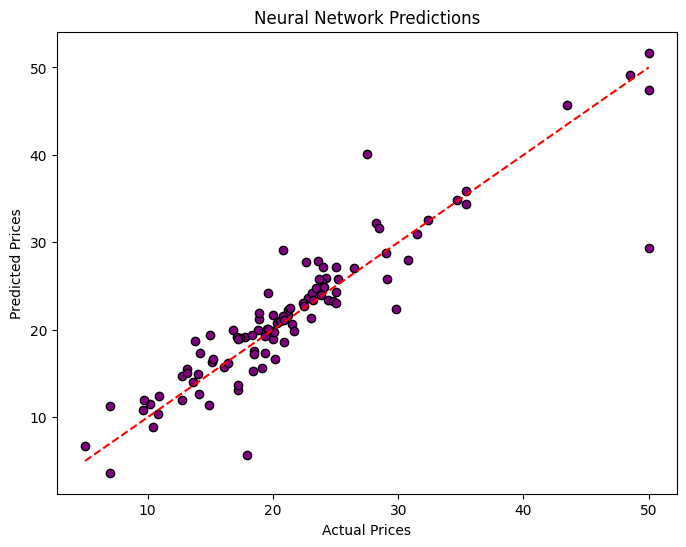

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled).ravel()

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network R²: {r2:.2f}")

# Plotting actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Neural Network Predictions")
plt.show()
